Missing Values:

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

Number of duplicate transactions: 0

Summary Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


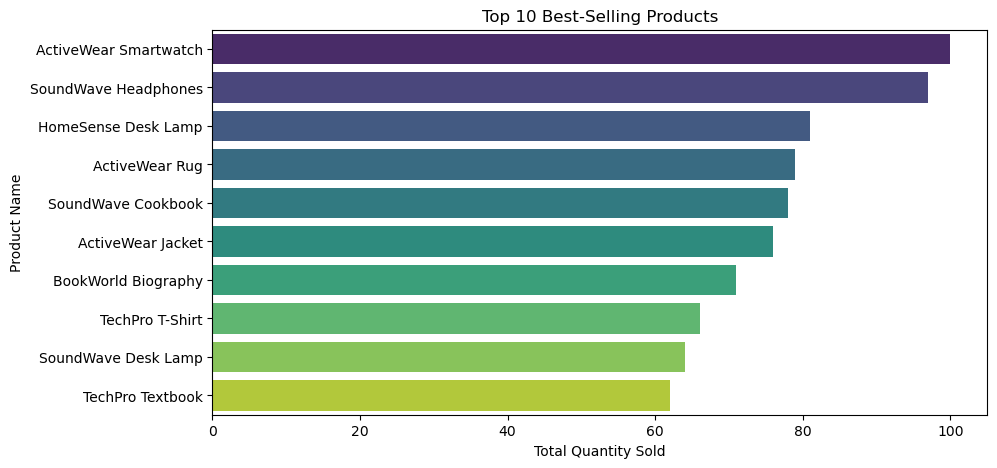

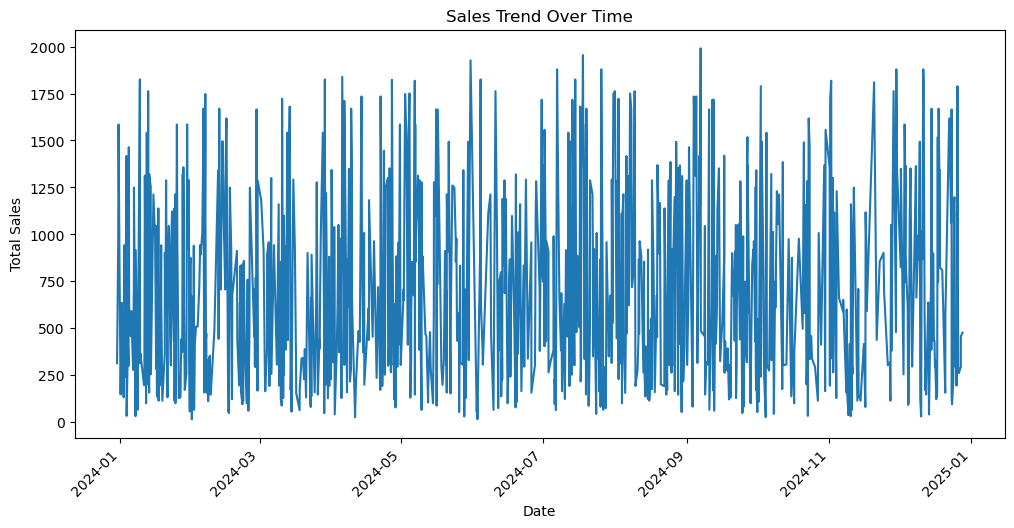

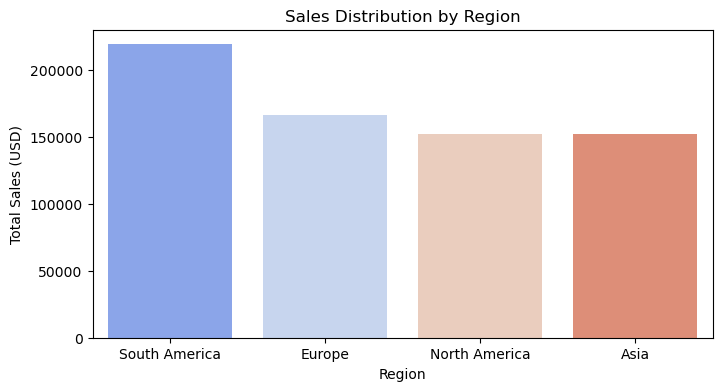

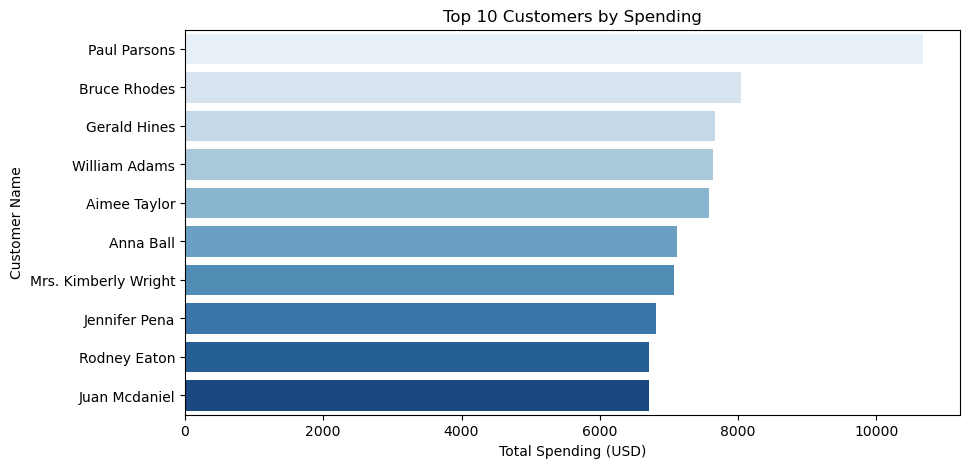

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Convert date columns to datetime format
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
transactions["TransactionDate"] = pd.to_datetime(transactions["TransactionDate"])

# Check for missing values
print("Missing Values:\n")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# Check for duplicates
duplicates = transactions.duplicated().sum()
print(f"\nNumber of duplicate transactions: {duplicates}")

# Merge transactions with customers and products
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# Summary statistics
print("\nSummary Statistics:")
print(data.describe())

# Top 10 selling products
top_products = data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 10 Best-Selling Products")
plt.show()

# Sales Trend Over Time
plt.figure(figsize=(12,6))
data.groupby("TransactionDate")["TotalValue"].sum().plot()
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.title("Sales Trend Over Time")
plt.xticks(rotation=45)
plt.show()

# Sales by Region
region_sales = data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.title("Sales Distribution by Region")
plt.show()

# Top Customers by Spending
top_customers = data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette="Blues")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Customer Name")
plt.title("Top 10 Customers by Spending")
plt.show()
